In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import loadmat
data = loadmat('notMNIST_small.mat')
X_temp = data['images']/255

#for i in range(X_temp.shape[2]):
    
X = np.empty(shape=[X_temp.shape[2]] + [784], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,:] = X_temp[:,:,i].flatten()

y = pd.get_dummies(data['labels']).to_numpy()

print(X_temp.shape)
print(X.shape)
print(y.shape)
X[1,:]

(28, 28, 18724)
(18724, 784)
(18724, 10)


array([0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03137255, 0.16078432, 0.38039216, 0.6509804 , 0.87058824,
       0.9764706 , 0.90588236, 0.6627451 , 0.4       , 0.11764706,
       0.        , 0.00784314, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07450981,
       0.3647059 , 0.44313726, 0.42745098, 0.4627451 , 0.5019608 ,
       0.54509807, 0.6392157 , 0.77254903, 0.8627451 , 0.9607843 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99607843, 1.        , 0.94509804, 0.42352942, 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01176471, 0.654902  , 1.        , 0.9843137 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99607843, 0.98039216, 0.972549  ,
       0.99215686, 1.        , 0.99607843, 0.9882353 , 0.99215

(28, 28)


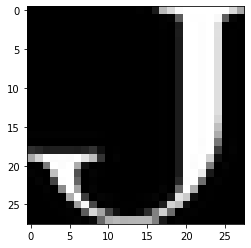

In [2]:
print(X_temp[:,:,3].shape)
plt.imshow(X_temp[:,:,3],cmap="gray");

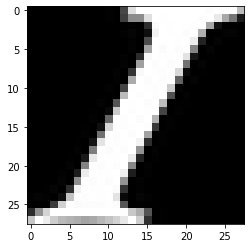

In [3]:
plt.imshow(X_temp[:,:,4504],cmap="gray");

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=50)
print(X_train.shape)
print(y_train.shape)

(14979, 784)
(14979, 10)


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model2 = Sequential()

model2.add(Dense(units=90000, input_shape=[X_train.shape[1]], 
                activation='relu', bias_regularizer =l1(0.00000001), kernel_regularizer=l1(0.000000000001)))

model2.add(Dense(units=10, input_shape=[784], activation='sigmoid', kernel_regularizer=l1(0.00000001)))

# Compile model
sgd = SGD(lr=0.01)
model2.compile(loss='categorical_crossentropy', optimizer=sgd)

Using TensorFlow backend.


In [6]:
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 90000)             70650000  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                900010    
Total params: 71,550,010
Trainable params: 71,550,010
Non-trainable params: 0
_________________________________________________________________


In [7]:

# Fit the model
history = model2.fit(X_train, y_train, batch_size = 256,
          epochs = 15, verbose=2, validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 14979 samples, validate on 3745 samples
Epoch 1/15





 - 59s - loss: 1.8974 - val_loss: 1.4202
Epoch 2/15
 - 56s - loss: 1.1211 - val_loss: 0.8982
Epoch 3/15
 - 57s - loss: 0.7944 - val_loss: 0.7078
Epoch 4/15
 - 56s - loss: 0.6620 - val_loss: 0.6174
Epoch 5/15
 - 56s - loss: 0.5920 - val_loss: 0.5665
Epoch 6/15
 - 57s - loss: 0.5489 - val_loss: 0.5327
Epoch 7/15
 - 56s - loss: 0.5194 - val_loss: 0.5121
Epoch 8/15
 - 56s - loss: 0.4995 - val_loss: 0.4947
Epoch 9/15
 - 56s - loss: 0.4867 - val_loss: 0.4785
Epoch 10/15
 - 57s - loss: 0.4768 - val_loss: 0.4691
Epoch 11/15
 - 56s - loss: 0.4661 - val_loss: 0.4562
Epoch 12/15
 - 56s - loss: 0.4625 - val_loss: 0.4472
Epoch 13/15
 - 56s - loss: 0.4576 - val_loss: 0.4476
Epoch 14/15
 - 55s - loss: nan - val_loss: nan
Epoch 15/15
 - 55s - loss: nan - val_loss: nan


Loss after final iteration:  nan


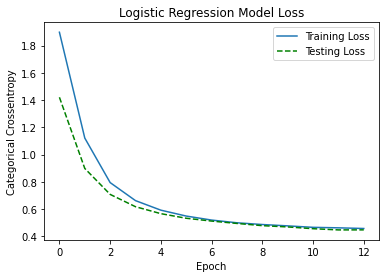

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
plt.show()